In [ ]:
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import sys
import os.path
import datetime

In [ ]:
cwd = pathlib.Path().resolve()
src = cwd.parent
data = src.parent.parent.parent

data_path = os.path.join(data, 'OneDrive - Delft University of Technology', 'TU Delft', 'Master ENVM', 'MDP', 'Model', 'Data', 'TAHMO')

In [ ]:
path = os.path.join(data_path, 'TA00024_timeseries.csv')
                    
df_station_00024 = pd.read_csv(path, sep=',', index_col=0, parse_dates=True) 
df_station_00024.index = pd.to_datetime(df_station_00024.index)

df_station_00024_temp = df_station_00024['te']
df_station_00024_temp_daily_mean = df_station_00024_temp.resample('D').mean()
df_station_00024_temp_daily_min = df_station_00024_temp.resample('D').min()
df_station_00024_temp_daily_max = df_station_00024_temp.resample('D').max()

df_station_00024_pr = df_station_00024['pr']
df_station_00024_pr_daily = df_station_00024_pr.resample('D').sum()


In [ ]:
def Extra_rad(Tmax, Tmin, df, lat):
    "Calculation of Extraterrestrial radiation"
    G = 0.0820 #* 10 ** 6 # J/m^2/min  --> Constant value

    # Calculation of the radian location of the station
    phi = np.pi / 180 * lat

    # Calculation of the number of the day in a year
    J = df.index.dayofyear.values  # Extract day of the year directly from the index

    # Calculation of the extraterrestrial radiation: Ra
    dr = 1 + 0.033 * np.cos(2 * np.pi * J / 365)
    delta = 0.409 * np.sin((2 * np.pi * J / 365) - 1.39)
    w = np.arccos(- np.tan(phi) * np.tan(delta))
    Ra = ((24 * 60) / np.pi) * G * dr * (w * np.sin(phi) * np.sin(delta) + np.cos(phi) * np.cos(delta) * np.sin(w)) #* 10 ** - 6

    # Create a DataFrame with Ra values and corresponding timestamps
    Ra_df = pd.DataFrame({'Ra': Ra}, index=df.index)

    return Ra_df

In [ ]:
# Extra rad
lat = -1.071545386681787

station_00024_ER = Extra_rad(df_station_00024_temp_daily_max, df_station_00024_temp_daily_min, df_station_00024, lat)
df_station_00024_ER = pd.DataFrame(station_00024_ER)

df_station_00024_ER.index = pd.to_datetime(df_station_00024_ER.index)
df_station_00024_daily_ER = df_station_00024_ER.resample('D').mean()
df_station_00024_daily_ER

,Ra
Timestamp,
2018-01-01,36.186101
2018-01-02,36.205911
2018-01-03,36.226958
2018-01-04,36.249216
2018-01-05,36.272656
...,...
2023-12-27,36.106428
2023-12-28,36.119712
2023-12-29,36.134339


In [ ]:
df_station_00024_daily = pd.concat([df_station_00024_pr_daily, df_station_00024_temp_daily_mean, df_station_00024_temp_daily_max, df_station_00024_temp_daily_min, df_station_00024_daily_ER], axis=1)

df_station_00024_daily.columns = ['pr', 'te_mean', 'te_max', 'te_min','ra']

df_station_00024_daily


,pr,te_mean,te_max,te_min,ra
Timestamp,,,,,
2018-01-01,0.020,21.231944,28.8,13.1,36.186101
2018-01-02,0.000,21.345139,28.3,16.2,36.205911
2018-01-03,2.020,20.277778,28.3,17.4,36.226958
2018-01-04,0.280,19.679861,24.4,16.8,36.249216
2018-01-05,0.000,21.121528,27.2,15.5,36.272656
...,...,...,...,...,...
2023-12-27,0.102,19.244792,25.7,13.9,36.106428
2023-12-28,0.068,20.607639,27.4,12.3,36.119712
2023-12-29,0.000,21.211806,27.2,15.8,36.134339


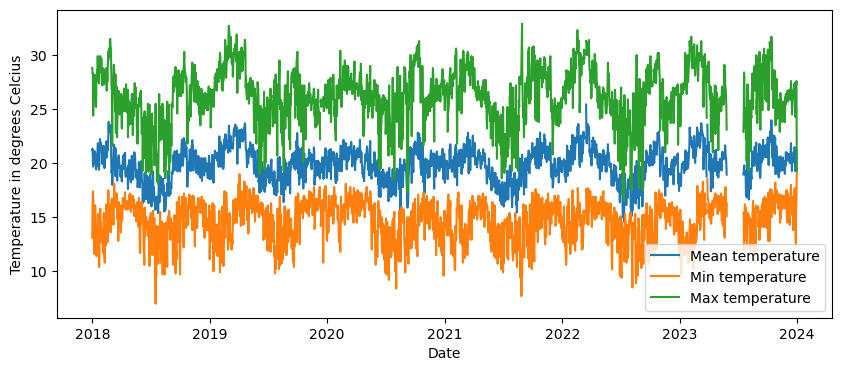

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df_station_00024_daily['te_mean'], label = 'Mean temperature')
plt.plot(df_station_00024_daily['te_min'], label = 'Min temperature')
plt.plot(df_station_00024_daily['te_max'], label = 'Max temperature')
plt.xlabel('Date')
plt.ylabel('Temperature in degrees Celcius')
plt.legend()